# Title : Predicting football player overall rating

Dataset : https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database

Data collection process for FIFA player ratings. Here are the key details about this process:

1. EA Sports uses a network of 9,000 data reviewers, also called FIFA Talent Scouts.

2. This network includes some professional scouts and coaches, but consists heavily of season ticket holders who can watch many matches in person.

3. Data reviewers provide feedback on players through a secure EA Sports website.

4. The feedback is largely subjective, based on the "eye test" of watching players in action.

5. For lesser-known players or new transfers, initial ratings may involve some guesswork until reviewers have seen the player in action.

6. The data collection process is necessary because no single stats provider can offer data for all the leagues, teams, and players in the game.

7. Data reviewers assess not just quantitative skills, but also qualitative aspects like a player's intelligence, resilience, and playing style.

8. The process allows EA to gather information on players from lower leagues or less prominent teams that might not be covered by traditional statistics providers.

9. This system enables EA to maintain and update a database of over 18,000 players across 700 clubs, totaling about 5.4 million data points.

10. The subjective nature of this process allows for capturing nuances in player performance that might not be reflected in pure statistics, but it also introduces potential biases or inconsistencies in ratings.

Source : https://www.goal.com/en-in/news/fifa-player-ratings-explained-how-are-the-card-number--stats-decided/1hszd2fgr7wgf1n2b2yjdpgynu


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [2]:
file = 'https://raw.githubusercontent.com/manishh18/mlproject1/main/FIFA17_official_data%20(1).csv'
df = pd.read_csv(file)

1. Basic Player Information
 - ID: A unique identifier for each player.
 - Name: The player's name.
 - Age: The player's age.
 - Photo: URL link to the player's photo.
 - Nationality: The country the player represents internationally.
 - Flag: URL link to the flag of the player's nationality.
 - Overall: The player's overall rating (out of 100).
 - Potential: The player's potential rating, representing how good the player could become.
 - Club: The current club the player is playing for.
 - Club Logo: URL link to the club's logo.
 - Value: The estimated market value of the player (in Euros).
 - Wage: The player's weekly wage (in Euros).
 - Special: A score for how "special" or unique the player is within the game.
2. Player Attributes
 - Preferred Foot: Whether the player prefers using their right or left foot.
 - International Reputation: A score (usually 1-5) indicating how well-known the player is globally.
 - Weak Foot: A score (1-5) indicating the player's ability with their non-preferred foot.
 - Skill Moves: A score (1-5) representing the player's ability to perform skill moves.
 - Work Rate: Describes the player’s effort both offensively and defensively, often listed as two categories (e.g., "High/Medium").
 - Body Type: A description of the player's body build.
 - Real Face: Whether the player’s in-game model resembles their real-world appearance ("Yes" or "No").
 - Position: The player’s main position(s) on the field.
 - Jersey Number: The number the player wears on their jersey.
 - Joined: The date the player joined their current club.
 - Loaned From: If the player is on loan, this field shows the player's parent club.
 - Contract Valid Until: The year the player’s contract expires.
 - Height: The player’s height (in feet and inches).
 - Weight: The player’s weight (in pounds).
3. Skill Attributes
These fields represent specific in-game football skills, typically rated from 0 to 100:

 - Crossing: Ability to deliver accurate crosses from the wings.
 - Finishing: Ability to score goals.
 - HeadingAccuracy: Accuracy in heading the ball.
 - ShortPassing: Ability to pass the ball over short distances.
 - Volleys: Ability to strike the ball on the volley.
 - Dribbling: Skill in controlling the ball while dribbling.
 - Curve: Ability to bend the ball, typically for shots and crosses.
 - FKAccuracy: Free-kick accuracy.
 - LongPassing: Ability to pass the ball over long distances.
 - BallControl: Skill in controlling the ball under pressure.
4. Physical Attributes
 - Acceleration: How quickly the player can reach top speed.
 - SprintSpeed: Top speed the player can achieve.
 - Agility: How quickly the player can change direction.
 - Reactions: How quickly the player reacts to situations on the pitch.
 - Balance: The player’s ability to maintain balance.
 - ShotPower: The power behind the player’s shots.
 - Jumping: How high the player can jump.
 - Stamina: How long the player can maintain high levels of performance.
 - Strength: The player’s physical strength in duels.
 - LongShots: Ability to shoot accurately from long distances.
5. Defensive Attributes
 - Aggression: The player’s intensity in challenges and duels.
 - Interceptions: Ability to intercept passes.
 - Positioning: Ability to find and maintain good attacking positions.
 - Vision: Ability to pick out creative passes.
 - Penalties: Skill in taking penalty kicks.
 - Composure: How composed the player is under pressure.
 - Marking: Ability to mark and track opposing players.
 - StandingTackle: Skill in performing standing tackles.
 - SlidingTackle: Skill in performing sliding tackles.
 - GKDiving: Diving ability.
 - GKHandling: Ability to hold onto or catch the ball.
 - GKKicking: Kicking ability.
 - GKPositioning: How well-positioned the goalkeeper is.
 - GKReflexes: Reflexes in goalkeeping situations.
7. Best Position and Rating
 - Best Position: The player’s best position on the field.
 - Best Overall Rating: The best overall rating the player can achieve in their best position.

In [3]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating
0,176580,L. Suárez,29,https://cdn.sofifa.com/players/176/580/17_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,92,92,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,30.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0
1,178518,R. Nainggolan,28,https://cdn.sofifa.com/players/178/518/17_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,86,86,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,78.0,85.0,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0
2,181872,A. Vidal,29,https://cdn.sofifa.com/players/181/872/17_60.png,Chile,https://cdn.sofifa.com/flags/cl.png,87,87,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,76.0,89.0,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0
3,197445,D. Alaba,24,https://cdn.sofifa.com/players/197/445/17_60.png,Austria,https://cdn.sofifa.com/flags/at.png,86,89,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,81.0,83.0,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0
4,195864,P. Pogba,23,https://cdn.sofifa.com/players/195/864/17_60.png,France,https://cdn.sofifa.com/flags/fr.png,88,94,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,68.0,73.0,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17560 entries, 0 to 17559
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17560 non-null  int64  
 1   Name                      17560 non-null  object 
 2   Age                       17560 non-null  int64  
 3   Photo                     17560 non-null  object 
 4   Nationality               17560 non-null  object 
 5   Flag                      17560 non-null  object 
 6   Overall                   17560 non-null  int64  
 7   Potential                 17560 non-null  int64  
 8   Club                      17317 non-null  object 
 9   Club Logo                 17560 non-null  object 
 10  Value                     17560 non-null  object 
 11  Wage                      17560 non-null  object 
 12  Special                   17560 non-null  int64  
 13  Preferred Foot            17560 non-null  object 
 14  Intern

# Dropping unnecessary features and getting metadata


In [5]:
df = df.drop(columns=["ID","Name","Photo","Position","Nationality","Flag","Club Logo","Real Face","Loaned From"])

In [6]:
df['Club'].unique()

array(['FC Barcelona', 'Roma', 'FC Bayern München', 'Manchester United',
       'Real Madrid', 'Everton', 'Juventus', 'Shakhtar Donetsk',
       'AS Monaco', 'VfL Wolfsburg', 'Milan', 'Olympique de Marseille',
       'Olympique Lyonnais', 'Beşiktaş JK', 'Manchester City',
       'Liverpool', 'FC Rostov', 'Tottenham Hotspur', 'Sporting CP',
       'Arsenal', 'Paris Saint-Germain', 'Napoli', nan, 'FC Schalke 04',
       'OGC Nice', 'SL Benfica', 'Borussia Dortmund', 'UD Las Palmas',
       'FC Porto', 'Lazio', 'Borussia Mönchengladbach', 'PFC CSKA Moscow',
       'Chievo Verona', 'Chelsea', 'Leicester City', 'Lokomotiv Moscow',
       'Atlético Madrid', 'Sevilla FC', 'Crystal Palace', 'Chicago Fire',
       'Genoa', 'Bournemouth', 'Club Athletico Paranaense',
       'Athletic Club de Bilbao', 'Montpellier HSC', 'West Ham United',
       'SV Werder Bremen', 'Villarreal CF', 'Zenit St. Petersburg',
       '1. FC Köln', 'Stoke City', 'Inter', 'Valencia CF', 'Southampton',
       'Watford', 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17560 entries, 0 to 17559
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       17560 non-null  int64  
 1   Overall                   17560 non-null  int64  
 2   Potential                 17560 non-null  int64  
 3   Club                      17317 non-null  object 
 4   Value                     17560 non-null  object 
 5   Wage                      17560 non-null  object 
 6   Special                   17560 non-null  int64  
 7   Preferred Foot            17560 non-null  object 
 8   International Reputation  17560 non-null  float64
 9   Weak Foot                 17560 non-null  float64
 10  Skill Moves               17560 non-null  float64
 11  Work Rate                 17560 non-null  object 
 12  Body Type                 17560 non-null  object 
 13  Jersey Number             17541 non-null  float64
 14  Joined

In [8]:
df.isna().sum()

,0
Age,0
Overall,0
Potential,0
Club,243
Value,0
Wage,0
Special,0
Preferred Foot,0
International Reputation,0
Weak Foot,0


### Extracting Year from 'Joined' Date

In [9]:
def take_year_only(data):
    values = data.astype(str).str.split(',')
    new_data = []

    for value in values:
        if isinstance(value, list):
            value = value[-1].strip()
            new_data.append(value)
    return new_data

df['Joined_year'] = take_year_only(df['Joined'])


In [10]:
new_data = df['Joined_year'].dropna()
new_data = new_data[new_data != 'nan'].astype(int)
# new_data = pd.DataFrame(new_data,columns=df['Joined_year'])

In [11]:
df = df.drop(columns="Joined")

<BarContainer object of 21 artists>

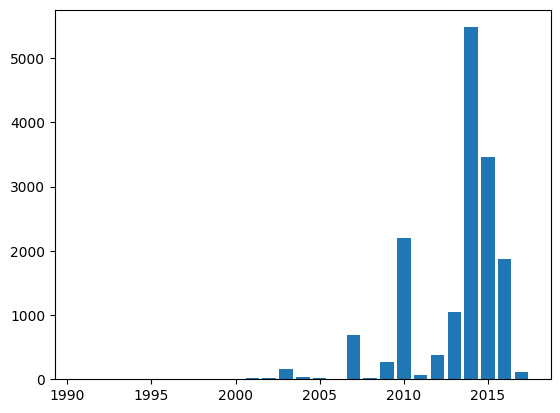

In [12]:
plt.bar(new_data.unique(),new_data.value_counts())

In [13]:
new_data.describe()

,Joined_year
count,15865.000000
mean,2014.819918
std,2.148521
min,1991.000000
25%,2014.000000
50%,2015.000000
75%,2016.000000
max,2017.000000


### Filling missing values

In [14]:
#Using median as it is skewed data
imp = SimpleImputer(missing_values=np.nan, strategy='median')
df['Joined_year'] = imp.fit_transform(df['Joined_year'].values.reshape(-1, 1))

In [15]:
df['Joined_year'].astype(int)

,Joined_year
0,2014
1,2014
2,2015
3,2010
4,2016
...,...
17555,2016
17556,2003
17557,2016
17558,2016


# After fitting missing values distribution of the data

[]

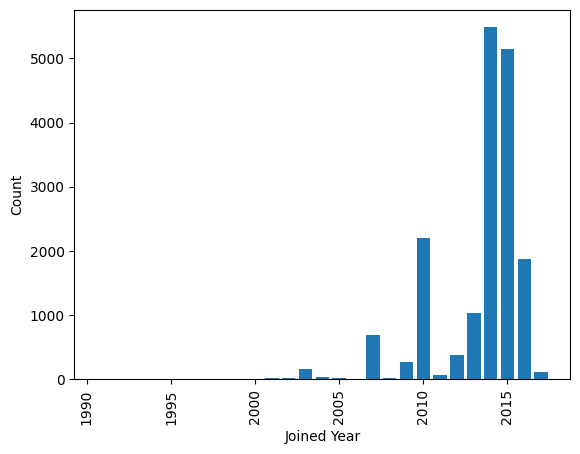

In [16]:
plt.bar(df['Joined_year'].unique(),df['Joined_year'].value_counts())
plt.xlabel('Joined Year')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.plot()

In [17]:
df['Joined_year'] = df['Joined_year'].astype(int)

In [18]:
df['Contract_valid_until'] = take_year_only(df['Contract Valid Until'])
imp = SimpleImputer(missing_values=np.nan,strategy='median')
df['Contract_valid_until'] = imp.fit_transform(df['Contract_valid_until'].values.reshape(-1, 1))

In [19]:
df.drop(columns='Contract Valid Until',inplace=True)

In [20]:
df['Contract_valid_until'] = take_year_only(df['Contract_valid_until'])

In [21]:
df['Contract_valid_until'] = df['Contract_valid_until'].astype(float).astype(int)

In [22]:
df.head()

,Age,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Joined_year,Contract_valid_until
0,29,92,92,FC Barcelona,€83M,€525K,2291,Right,5.0,4.0,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,2014,2021
1,28,86,86,Roma,€37.5M,€130K,2290,Right,3.0,3.0,...,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0,2014,2021
2,29,87,87,FC Bayern München,€41.5M,€180K,2285,Right,4.0,4.0,...,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0,2015,2019
3,24,86,89,FC Bayern München,€41.5M,€140K,2279,Left,4.0,4.0,...,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0,2010,2021
4,23,88,94,Manchester United,€71.5M,€225K,2271,Right,4.0,4.0,...,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0,2016,2021


Text(0.5, 1.0, 'Joining year vs Constract validate year')

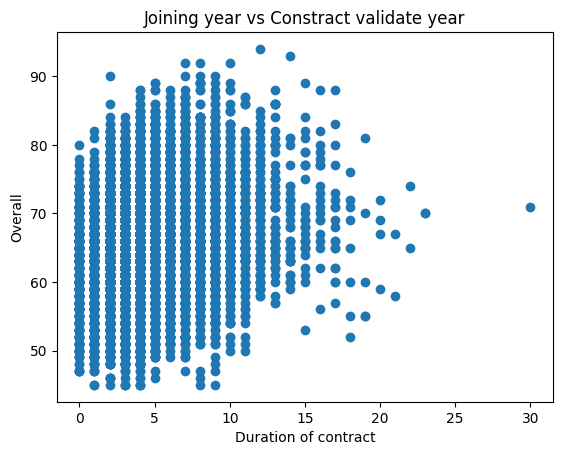

In [23]:
plt.scatter(df['Contract_valid_until'] - df['Joined_year'],df['Overall'])
plt.xlabel('Duration of contract')
plt.ylabel('Overall')
plt.title('Joining year vs Constract validate year')

In [24]:
#There is no strong linear/curvilinear correlation between overall and contract duration or Club Joining year so removing these two attributes
df = df.drop(columns=["Joined_year","Contract_valid_until",'Jersey Number'])

In [25]:
print(df.isna().sum(),df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17560 entries, 0 to 17559
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       17560 non-null  int64  
 1   Overall                   17560 non-null  int64  
 2   Potential                 17560 non-null  int64  
 3   Club                      17317 non-null  object 
 4   Value                     17560 non-null  object 
 5   Wage                      17560 non-null  object 
 6   Special                   17560 non-null  int64  
 7   Preferred Foot            17560 non-null  object 
 8   International Reputation  17560 non-null  float64
 9   Weak Foot                 17560 non-null  float64
 10  Skill Moves               17560 non-null  float64
 11  Work Rate                 17560 non-null  object 
 12  Body Type                 17560 non-null  object 
 13  Height                    17560 non-null  object 
 14  Weight

In [26]:
# Check missing values and their proportions
missing_values = df['Club'].isna().sum()
total_rows = len(df)
missing_percentage = (missing_values / total_rows) * 100

if missing_percentage > 5:
    print("Consider removing or handling missing values carefully.")
else:
    print("Consider filling missing values with imputation.")


Consider filling missing values with imputation.


In [27]:
# Fill missing values with a placeholder string
df['Club'] = df['Club'].fillna('Unknown')
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values='Unknown', strategy='most_frequent')

df['Club'] = imp.fit_transform(df[['Club']]).ravel()


In [28]:
df.isna().sum()

,0
Age,0
Overall,0
Potential,0
Club,0
Value,0
Wage,0
Special,0
Preferred Foot,0
International Reputation,0
Weak Foot,0


In [29]:
df.to_csv('Football_cleaned_data.csv', index=False)


In [30]:
df = pd.read_csv('Football_cleaned_data.csv')

In [31]:
df.head()

,Age,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating
0,29,92,92,FC Barcelona,€83M,€525K,2291,Right,5.0,4.0,...,30.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0
1,28,86,86,Roma,€37.5M,€130K,2290,Right,3.0,3.0,...,78.0,85.0,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0
2,29,87,87,FC Bayern München,€41.5M,€180K,2285,Right,4.0,4.0,...,76.0,89.0,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0
3,24,86,89,FC Bayern München,€41.5M,€140K,2279,Left,4.0,4.0,...,81.0,83.0,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0
4,23,88,94,Manchester United,€71.5M,€225K,2271,Right,4.0,4.0,...,68.0,73.0,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0


In [32]:
#Changing M and K to amounts
def change_To_values(data):
    data = data.strip()
    if data[-1] == 'M':
        return float(data[1:-1]) * 1000000
    elif data[-1] == 'K' or data[-1] =='k':
        return float(data[1:-1]) * 1000
    else:
        try:
            return float(data[1:])
        except ValueError:
            return np.nan


df['Value'] = df['Value'].apply(change_To_values).astype(int)
df['Wage'] = df['Wage'].apply(change_To_values).astype(int)

In [33]:
#converting height into centimeters
def height_cen(i):

    feet = int(i[0])
    inches = int(i[2:])
    total_inches = (feet * 12) + inches
    centimeters = total_inches * 2.54
    return centimeters

df['Height'] = df['Height'].apply(height_cen)

In [34]:
# Converting weight from lb to kg
def convert_lbs_to_kg(data):
    data = data.split('lbs')[0].strip()
    in_kg = float(data) * 0.4535
    return round(in_kg,2)

df['Weight'] = df['Weight'].apply(convert_lbs_to_kg)

<Axes: xlabel='Preferred Foot', ylabel='count'>

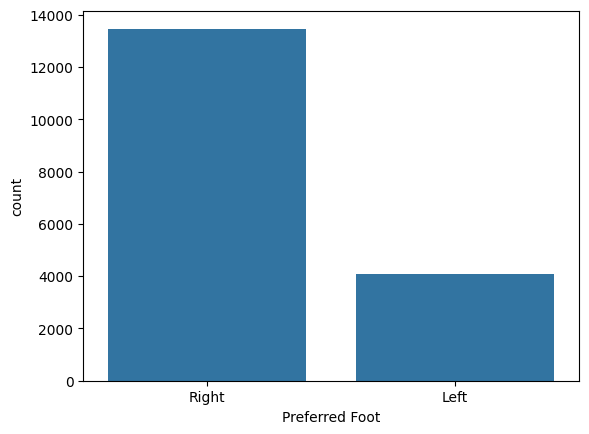

In [35]:
sns.countplot(x='Preferred Foot', data=df)

In [36]:
#Assigning prefered foot a numerical value
count_of_foot = df['Preferred Foot'].unique()
right_foot = df[df['Preferred Foot'] == count_of_foot[0]].shape[0]
left_foot = df[df['Preferred Foot'] == count_of_foot[1]].shape[0]
print(f"Right Foot Count: {right_foot}")
print(f"Left Foot Count: {left_foot}")

Right Foot Count: 13468
Left Foot Count: 4092


In [37]:
from sklearn.preprocessing import LabelEncoder
# Converting prefered foot into ordinal encoding because right has more count than left

lbe = LabelEncoder()
df['Preferred Foot'] = lbe.fit_transform(df[['Preferred Foot']])
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Age,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating
0,29,92,92,FC Barcelona,83000000,525000,2291,1,5.0,4.0,...,30.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0
1,28,86,86,Roma,37500000,130000,2290,1,3.0,3.0,...,78.0,85.0,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0
2,29,87,87,FC Bayern München,41500000,180000,2285,1,4.0,4.0,...,76.0,89.0,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0
3,24,86,89,FC Bayern München,41500000,140000,2279,0,4.0,4.0,...,81.0,83.0,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0
4,23,88,94,Manchester United,71500000,225000,2271,1,4.0,4.0,...,68.0,73.0,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0


In [38]:
#Handling Work rate attribute
df[['Attack_Work_Rate', 'Defend_Work_Rate']] = df['Work Rate'].str.split('/ ', expand=True)
df.drop(columns='Work Rate', inplace=True)
df.head()

,Age,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Attack_Work_Rate,Defend_Work_Rate
0,29,92,92,FC Barcelona,83000000,525000,2291,1,5.0,4.0,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,High,Medium
1,28,86,86,Roma,37500000,130000,2290,1,3.0,3.0,...,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0,High,High
2,29,87,87,FC Bayern München,41500000,180000,2285,1,4.0,4.0,...,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0,High,High
3,24,86,89,FC Bayern München,41500000,140000,2279,0,4.0,4.0,...,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0,High,Medium
4,23,88,94,Manchester United,71500000,225000,2271,1,4.0,4.0,...,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0,High,Medium


In [39]:
#Converting it into ordinal encoding
work_rate_oe = OrdinalEncoder(categories=[['Low', 'Medium', 'High']],
                              handle_unknown='use_encoded_value', unknown_value=-1)
df['Defend_Work_Rate'] = work_rate_oe.fit_transform(df['Defend_Work_Rate'].values.reshape(-1,1))
df['Attack_Work_Rate'] = work_rate_oe.fit_transform(df['Attack_Work_Rate'].values.reshape(-1,1))
df.head()

,Age,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Attack_Work_Rate,Defend_Work_Rate
0,29,92,92,FC Barcelona,83000000,525000,2291,1,5.0,4.0,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,2.0,1.0
1,28,86,86,Roma,37500000,130000,2290,1,3.0,3.0,...,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0,2.0,2.0
2,29,87,87,FC Bayern München,41500000,180000,2285,1,4.0,4.0,...,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0,2.0,2.0
3,24,86,89,FC Bayern München,41500000,140000,2279,0,4.0,4.0,...,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0,2.0,1.0
4,23,88,94,Manchester United,71500000,225000,2271,1,4.0,4.0,...,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0,2.0,1.0


In [40]:
#Handling body type
df['Body Type'].unique()

array(['Normal (170-185)', 'Stocky (170-185)', 'Lean (170-185)',
       'Lean (185+)', 'Normal (170-)', 'C. Ronaldo', 'Normal (185+)',
       'Messi', 'Stocky (170-)', 'Lean (170-)', 'Shaqiri', 'Neymar',
       'Normal (190+)', 'Stocky (185+)', 'Akinfenwa', 'Courtois'],
      dtype=object)

In [41]:
import pandas as pd

body_types = ['Normal (170-185)', 'Stocky (170-185)', 'Lean (170-185)',
              'Lean (185+)', 'Normal (170-)', 'C. Ronaldo', 'Normal (185+)',
              'Messi', 'Stocky (170-)', 'Lean (170-)', 'Shaqiri', 'Neymar',
              'Normal (190+)', 'Stocky (185+)', 'Akinfenwa', 'Courtois']

athlete_body_types = {
    'C. Ronaldo': 'Lean (170-185)',
    'Messi': 'Stocky (170-185)',
    'Neymar': 'Lean (170-185)',
    'Akinfenwa': 'Stocky (170-185)',
    'Courtois': 'Normal (170-185)',
    'Shaqiri': 'Stocky (170-185)'
}

data = pd.DataFrame({'Body Type': body_types})

df['Standardized_Body_Type'] = df['Body Type'].apply(
    lambda x: athlete_body_types.get(x, x)
)


In [42]:
df['Standardized_Body_Type'].unique()

array(['Normal (170-185)', 'Stocky (170-185)', 'Lean (170-185)',
       'Lean (185+)', 'Normal (170-)', 'Normal (185+)', 'Stocky (170-)',
       'Lean (170-)', 'Normal (190+)', 'Stocky (185+)'], dtype=object)

In [43]:
df.drop(columns="Body Type",inplace=True)

In [44]:
#Ordinal encoding body type
categories = ['Lean (170-)', 'Lean (170-185)', 'Lean (185+)',
              'Normal (170-)', 'Normal (170-185)', 'Normal (185+)',
              'Normal (190+)', 'Stocky (170-)', 'Stocky (170-185)',
              'Stocky (185+)']
ode = OrdinalEncoder(categories=[categories])
df['Standardized_Body_Type'] = ode.fit_transform(df[['Standardized_Body_Type']])

In [45]:
df.head()

,Age,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Attack_Work_Rate,Defend_Work_Rate,Standardized_Body_Type
0,29,92,92,FC Barcelona,83000000,525000,2291,1,5.0,4.0,...,27.0,25.0,31.0,33.0,37.0,ST,88.0,2.0,1.0,4.0
1,28,86,86,Roma,37500000,130000,2290,1,3.0,3.0,...,11.0,11.0,14.0,8.0,11.0,CDM,84.0,2.0,2.0,8.0
2,29,87,87,FC Bayern München,41500000,180000,2285,1,4.0,4.0,...,4.0,2.0,4.0,2.0,4.0,CDM,85.0,2.0,2.0,4.0
3,24,86,89,FC Bayern München,41500000,140000,2279,0,4.0,4.0,...,5.0,7.0,14.0,15.0,9.0,LB,84.0,2.0,1.0,1.0
4,23,88,94,Manchester United,71500000,225000,2271,1,4.0,4.0,...,5.0,6.0,2.0,4.0,3.0,CAM,85.0,2.0,1.0,2.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17560 entries, 0 to 17559
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       17560 non-null  int64  
 1   Overall                   17560 non-null  int64  
 2   Potential                 17560 non-null  int64  
 3   Club                      17560 non-null  object 
 4   Value                     17560 non-null  int64  
 5   Wage                      17560 non-null  int64  
 6   Special                   17560 non-null  int64  
 7   Preferred Foot            17560 non-null  int64  
 8   International Reputation  17560 non-null  float64
 9   Weak Foot                 17560 non-null  float64
 10  Skill Moves               17560 non-null  float64
 11  Height                    17560 non-null  float64
 12  Weight                    17560 non-null  float64
 13  Crossing                  17560 non-null  float64
 14  Finish

In [47]:
df['Best Position'].unique()

array(['ST', 'CDM', 'LB', 'CAM', 'RB', 'LWB', 'CM', 'RWB', 'RM', 'LM',
       'CB', 'LW', 'CF', 'RW', 'GK'], dtype=object)

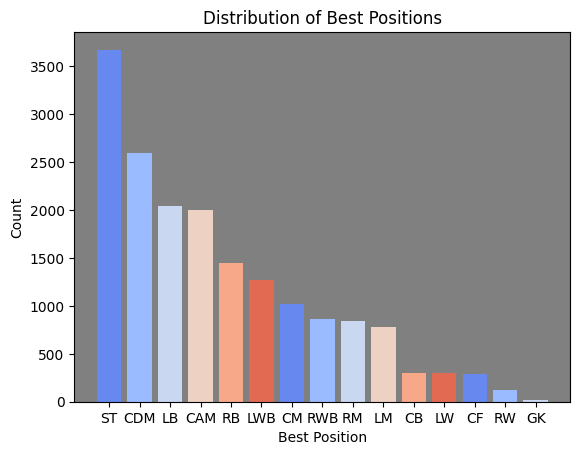

In [48]:
colors = sns.color_palette('coolwarm')
plt.bar(df['Best Position'].unique(), df['Best Position'].value_counts(), color=colors)
plt.gca().set_facecolor('gray')
plt.xlabel('Best Position')
plt.ylabel('Count')
plt.title('Distribution of Best Positions')
plt.show()

In [49]:
df['Best Position'].unique()

array(['ST', 'CDM', 'LB', 'CAM', 'RB', 'LWB', 'CM', 'RWB', 'RM', 'LM',
       'CB', 'LW', 'CF', 'RW', 'GK'], dtype=object)

In [50]:
df['Best_Position'] = df['Best Position'].copy()
df.loc[df['Best Position'].isin(('CF', 'ST','LW','RW')), 'Best_Position'] = 'Attacker'
df.loc[df['Best Position'].isin(('RM', 'CAM', 'CM', 'LM','CDM')), 'Best_Position'] = 'Midfielder'
df.loc[df['Best Position'].isin(('RB','RWB' ,'LB', 'LWB', 'GK','CB')), 'Best_Position'] = 'Defender'

df['Best Position'] = df['Best_Position']

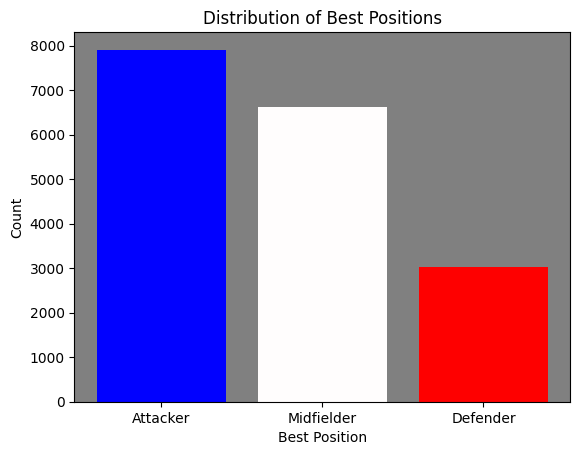

In [51]:
value = sns.color_palette(as_cmap='coolwarm')

palette = sns.color_palette('seismic', len(df['Best Position'].unique()))

plt.bar(df['Best Position'].unique(), df['Best Position'].value_counts(), color=palette)
plt.gca().set_facecolor('gray')
plt.xlabel('Best Position')
plt.ylabel('Count')
plt.title('Distribution of Best Positions')
plt.show()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17560 entries, 0 to 17559
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       17560 non-null  int64  
 1   Overall                   17560 non-null  int64  
 2   Potential                 17560 non-null  int64  
 3   Club                      17560 non-null  object 
 4   Value                     17560 non-null  int64  
 5   Wage                      17560 non-null  int64  
 6   Special                   17560 non-null  int64  
 7   Preferred Foot            17560 non-null  int64  
 8   International Reputation  17560 non-null  float64
 9   Weak Foot                 17560 non-null  float64
 10  Skill Moves               17560 non-null  float64
 11  Height                    17560 non-null  float64
 12  Weight                    17560 non-null  float64
 13  Crossing                  17560 non-null  float64
 14  Finish

In [53]:
df.drop(columns = ["Club","Best Position"],inplace=True)
#Converting Club to a usable datatype proved to be difficult

In [54]:
df.drop(columns='Best_Position',inplace=True)

In [55]:
df.head()

,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,Attack_Work_Rate,Defend_Work_Rate,Standardized_Body_Type
0,29,92,92,83000000,525000,2291,1,5.0,4.0,4.0,...,38.0,27.0,25.0,31.0,33.0,37.0,88.0,2.0,1.0,4.0
1,28,86,86,37500000,130000,2290,1,3.0,3.0,3.0,...,88.0,11.0,11.0,14.0,8.0,11.0,84.0,2.0,2.0,8.0
2,29,87,87,41500000,180000,2285,1,4.0,4.0,3.0,...,84.0,4.0,2.0,4.0,2.0,4.0,85.0,2.0,2.0,4.0
3,24,86,89,41500000,140000,2279,0,4.0,4.0,3.0,...,83.0,5.0,7.0,14.0,15.0,9.0,84.0,2.0,1.0,1.0
4,23,88,94,71500000,225000,2271,1,4.0,4.0,5.0,...,73.0,5.0,6.0,2.0,4.0,3.0,85.0,2.0,1.0,2.0


## Data exploration, visualization and merging features


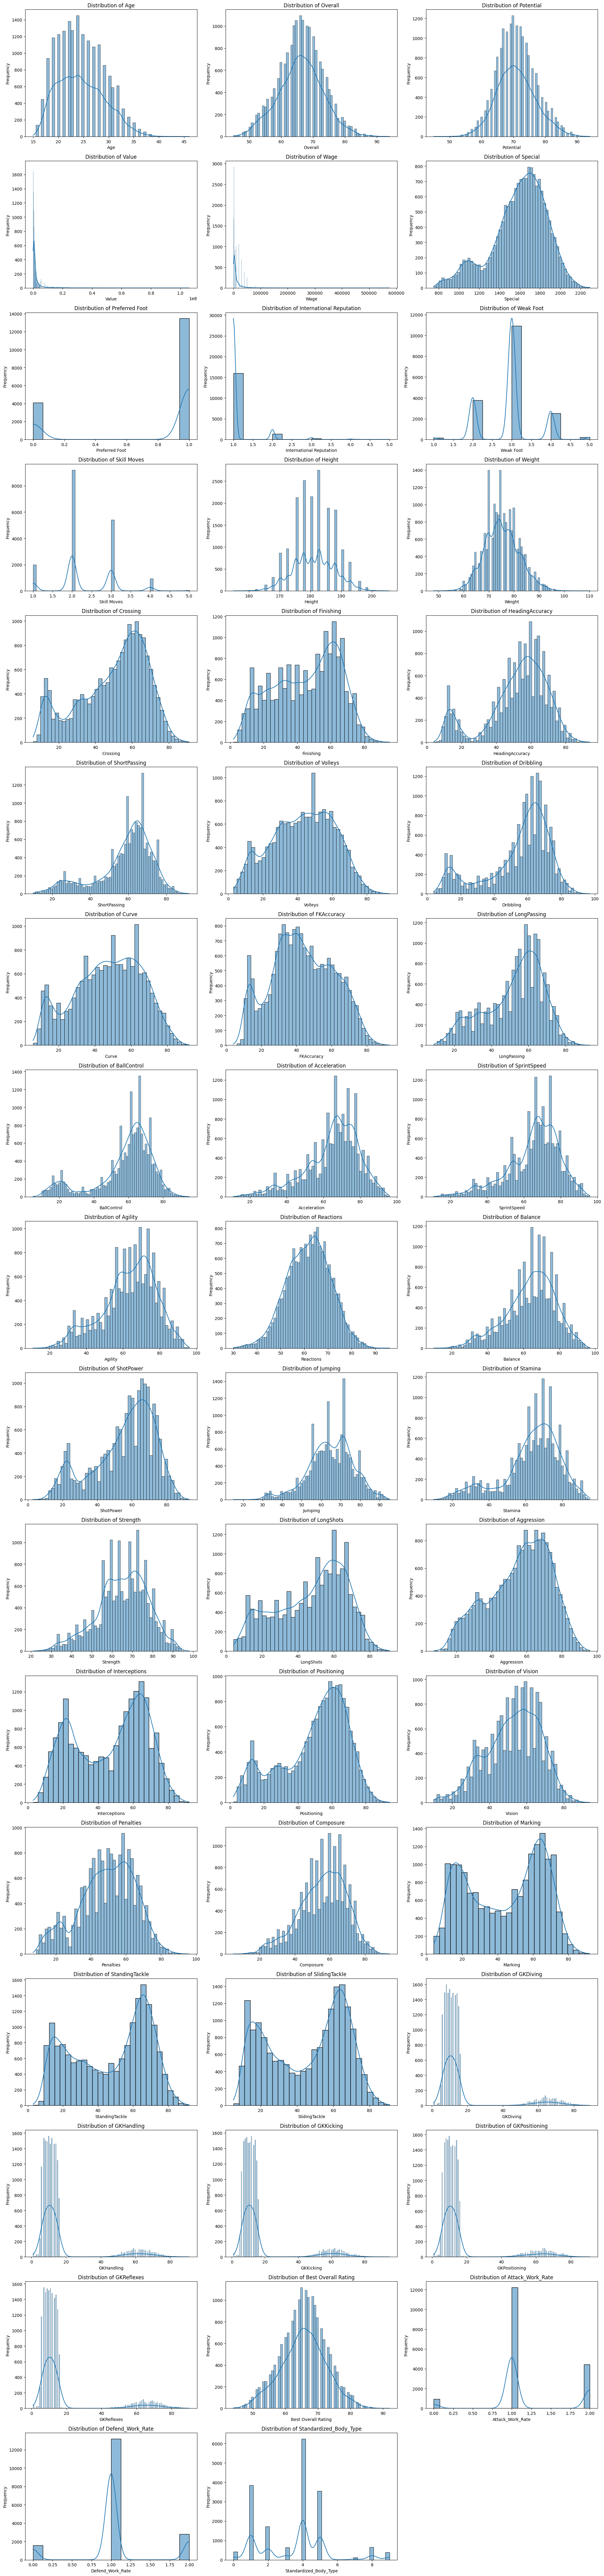

In [56]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns needed
n_features = len(numerical_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # This ensures we have enough rows

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easier indexing

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We will make an Offensive_Skills attribute merging Crossing, Finishing, Dribbling, Curve, BallControl. This can be done because they have similar distributions and logically these attributes fall under same category.

Similarly we will make a Defensive_Skills attribute merging Interceptions, Marking, StandingTackle and, SlidingTackle.

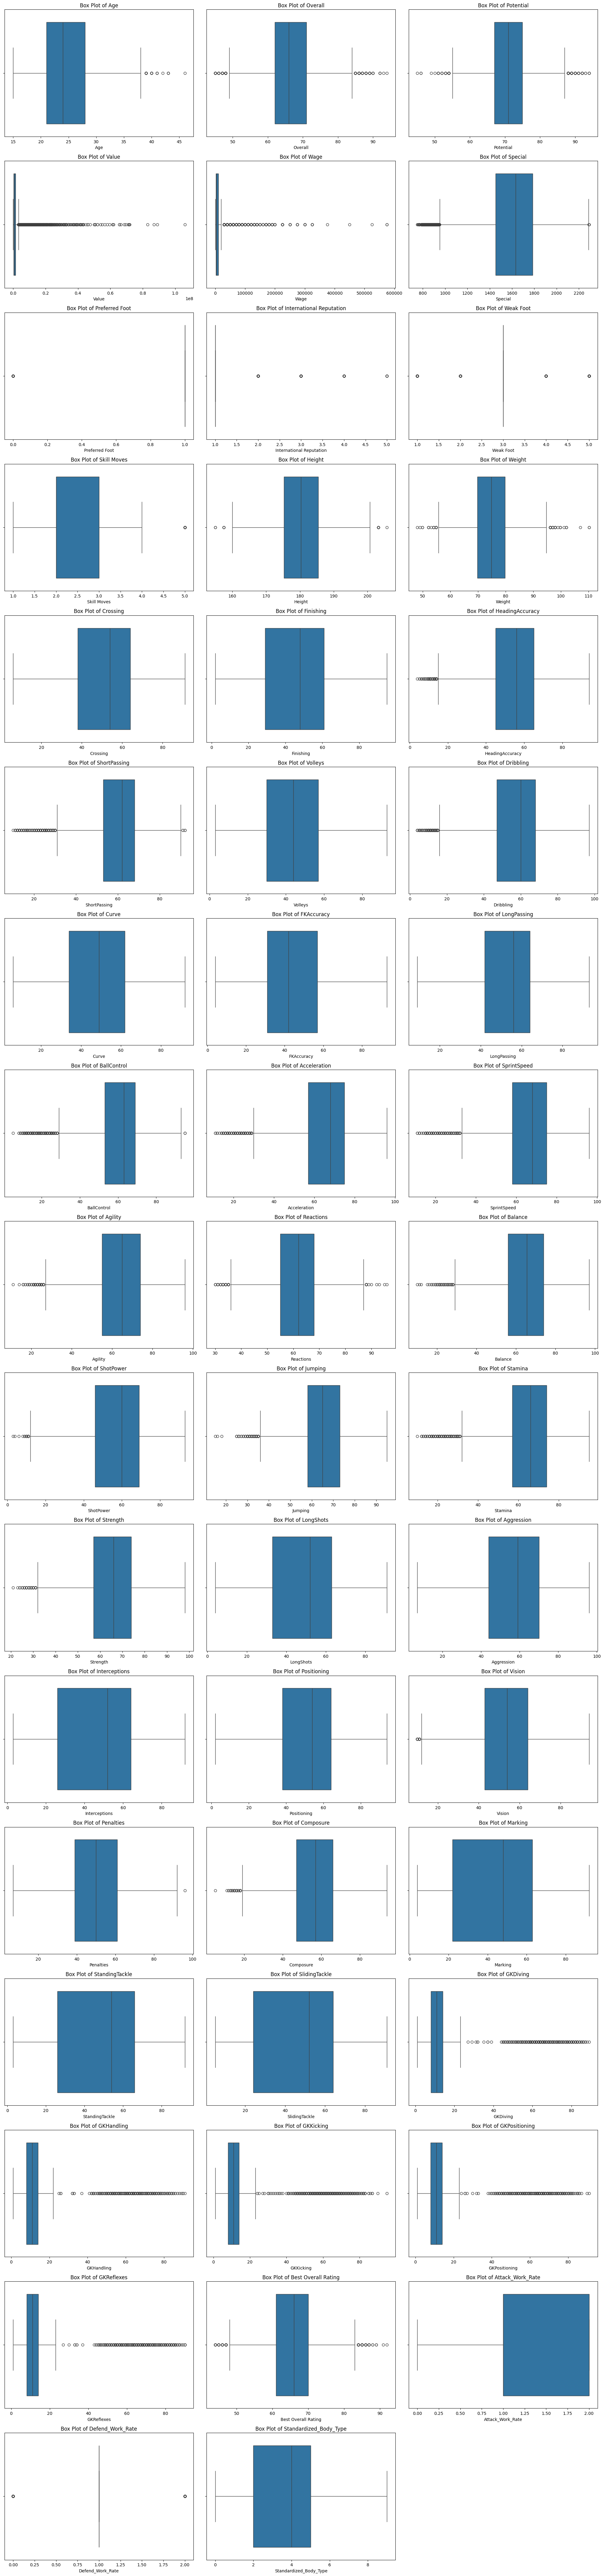

In [57]:
# Calculate the number of rows and columns needed
n_features = len(numerical_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # This ensures we have enough rows

# Subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))

# For easier indexing
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel(feature)

# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [58]:
df.columns

Index(['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Overall Rating',
       'Attack_Work_Rate', 'Defend_Work_Rate', 'Standardized_Body_Type'],
      dtype='object')

In [59]:
df['Marking'].describe()

,Marking
count,17560.000000
mean,44.225399
std,21.532570
min,4.000000
25%,22.000000
50%,48.000000
75%,63.000000
max,92.000000


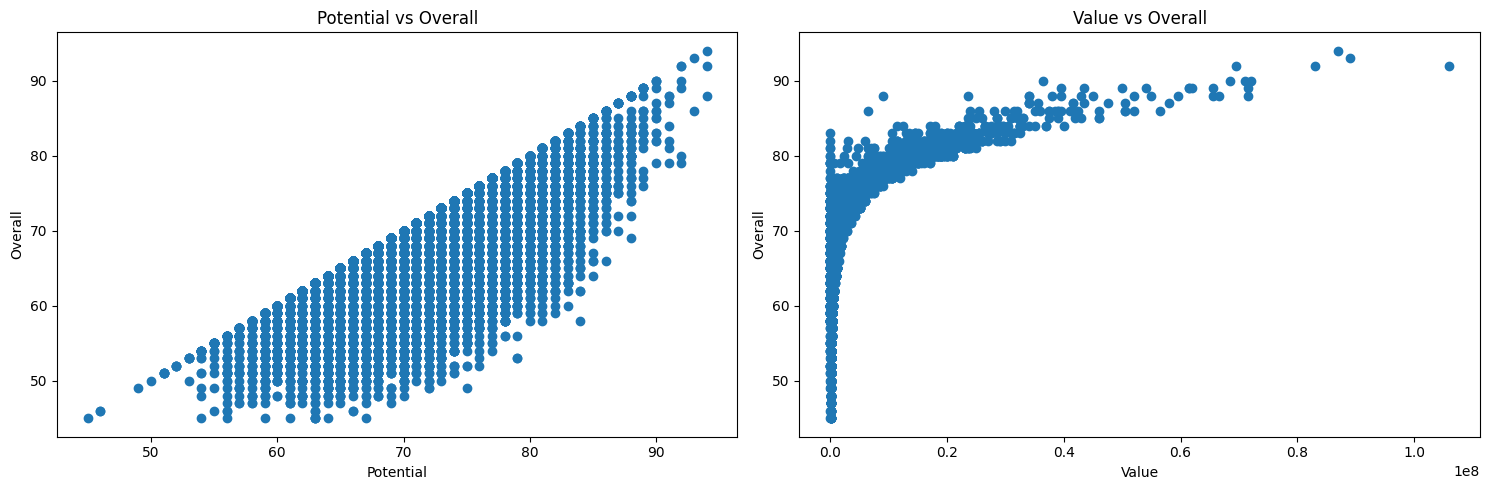

In [60]:
fig, arr = plt.subplots(1, 2, figsize=(15, 5))

variables = ['Potential', 'Value']

for ind, name in enumerate(variables):
    ax = arr[ind]
    ax.scatter(df[name], df['Overall'])
    ax.set_xlabel(name)
    ax.set_ylabel('Overall')
    ax.set_title(f'{name} vs Overall')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Association of Age potential and Overall')

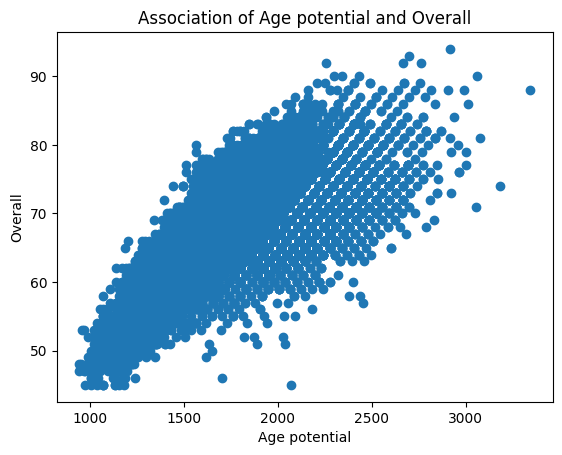

In [61]:
df['Age_Potential'] = df['Age'] * df['Potential']
plt.scatter(df['Age_Potential'],df['Overall'])
plt.xlabel('Age potential')
plt.ylabel('Overall')
plt.title('Association of Age potential and Overall')

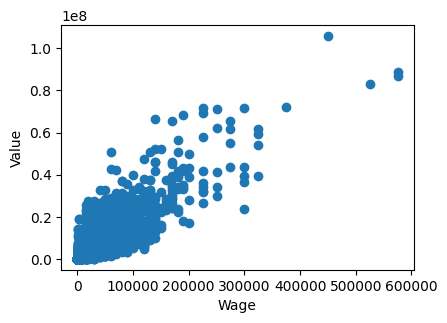

In [62]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
plt.scatter(df['Wage'],df['Value'])
plt.xlabel('Wage')
plt.ylabel('Value')

#Because of the strong positive relation between wage and values, we are dropping wage
df.drop(columns="Wage",inplace=True)

Text(0.5, 1.0, 'Relation of ball control and Overall')

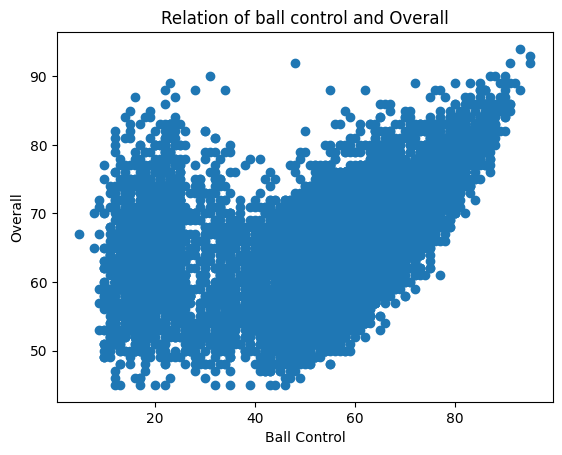

In [63]:
plt.scatter(df['BallControl'],df['Overall'])
plt.xlabel('Ball Control')
plt.ylabel('Overall')
plt.title('Relation of ball control and Overall')

Text(0.5, 1.0, 'Relation of dribbling and Overall')

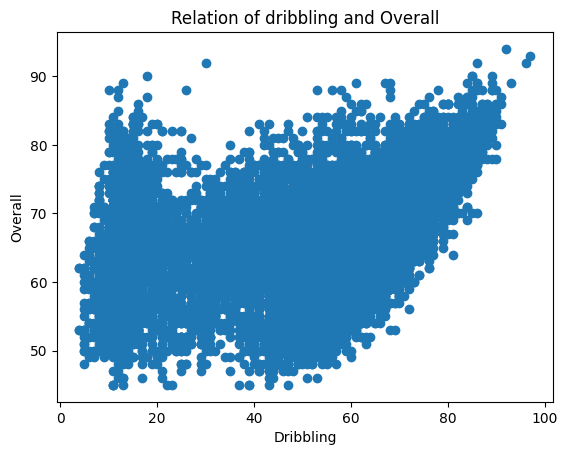

In [64]:
plt.scatter(df['Dribbling'],df['Overall'])
plt.xlabel('Dribbling')
plt.ylabel('Overall')
plt.title('Relation of dribbling and Overall')

In [65]:
# plt.scatter(df['Offensive_Skills'],df['Overall'])

Text(0.5, 1.0, 'Relation of dribbling and ball control')

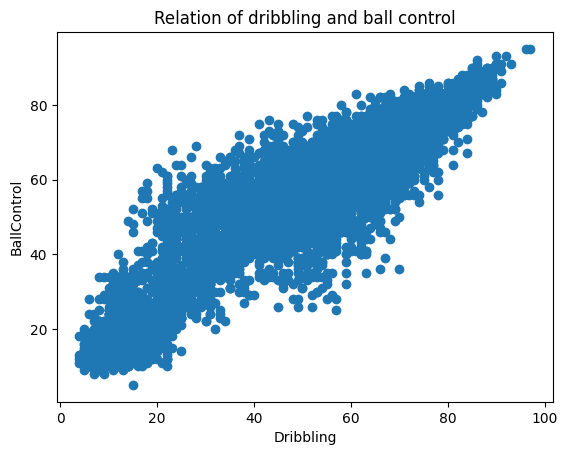

In [66]:
plt.scatter(df['Dribbling'],df['BallControl'])
plt.xlabel('Dribbling')
plt.ylabel('BallControl')
plt.title('Relation of dribbling and ball control')

This an example to further solidify the intuition of merging the features Crossing, Finishing, Dribbling, Curve, BallControl as they would tend to have strong positive relation

Text(0.5, 1.0, 'Association of ball control to dribbling and Overall')

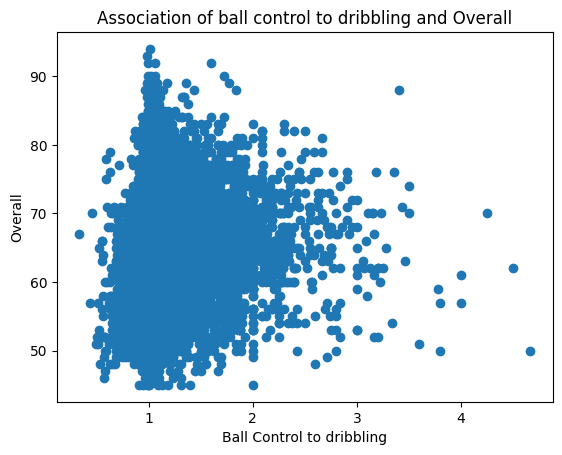

In [67]:
df['BallControl_to_Dribbling'] = df['BallControl'] / df['Dribbling']
plt.scatter(df['BallControl_to_Dribbling'],df['Overall'])
plt.xlabel('Ball Control to dribbling')
plt.ylabel('Overall')
plt.title('Association of ball control to dribbling and Overall')

In [68]:
#Merging these attributes to make one offensive skill attribute, as mentioned previously

df['Offensive_Skills'] = df[['Crossing', 'Finishing', 'Dribbling', 'Curve', 'BallControl']].median(axis=1)
# using median as they're skewed distributuions

In [69]:
#Merging these skills to make one defensive skill attribute, as mentioned previously
df['Defensive_Skills'] = df[['Interceptions', 'Marking', 'StandingTackle', 'SlidingTackle']].mean(axis=1)

In [70]:
#Merging these skills to make one physical skill attribute, as mentioned previously
df['Physical_Skills'] = df[['Acceleration', 'SprintSpeed', 'Agility', 'Strength']].median(axis=1)

Here, we're creating more meaningful features that capture the essence of the data
e.g. dribbling acceleration gives us players which are  
1. good at both
2. moderate at either of the two
3. bad at both

any good footballer regardless of playing position would be good at both

Note: look at hidden cells under title for further grouping details

In [71]:
df['SkillMoves_Crossing'] = df['Skill Moves'] * df['Crossing']
df['Dribbling_Acceleration'] = df['Dribbling'] * df['Acceleration']

In [72]:
df['Reactions_Potential'] = df['Reactions'] * df['Potential']
df['Vision_LongPassing'] = df['Vision'] * df['LongPassing']
df['Vision_ShortPassing'] = df['Vision'] * df['ShortPassing']

In [73]:
df['Pace'] = df[['Acceleration', 'SprintSpeed']].mean(axis=1)
df['Overall_Accuracy'] = df[['HeadingAccuracy', 'Volleys', 'FKAccuracy']].mean(axis=1)
df['Shooting_Accuracy'] = df[['Finishing', 'Volleys', 'LongShots']].mean(axis=1)

In [74]:
df['Attack_Defense_Ratio'] = df['Offensive_Skills'] / df['Defensive_Skills']
df['Experience'] = df[['Age', 'International Reputation']].median(axis=1)
df['Mental_Strength'] = df[['Aggression', 'Composure', 'Reactions']].mean(axis=1)

# Feature Selection

In [75]:
df.columns

Index(['Age', 'Overall', 'Potential', 'Value', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Height',
       'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Overall Rating', 'Attack_Work_Rate', 'Defend_Work_Rate',
       'Standardized_Body_Type', 'Age_Potential', 'BallControl_to_Dribbling',
       'Offensive_Skills', 'Defensive_Skills', 'Physical_Skills',
       'SkillMoves_Crossing', 'Dribbling_Acceleration', 'Reactions_Potential',
       'Vision_LongPassing', 'Vision_S

In [76]:
df.drop(columns='Best Overall Rating',inplace=True)
df.drop(columns=['Crossing', 'Finishing', 'Dribbling', 'Curve', 'BallControl'], inplace=True)

df.drop(columns=['Interceptions', 'Marking', 'StandingTackle', 'SlidingTackle'], inplace=True)

df.drop(columns=['Acceleration', 'SprintSpeed', 'HeadingAccuracy', 'FKAccuracy', 'LongShots',
                 'Vision', 'ShortPassing', 'Skill Moves'], inplace=True)

In [77]:
df.head()

,Age,Overall,Potential,Value,Special,Preferred Foot,International Reputation,Weak Foot,Height,Weight,...,Dribbling_Acceleration,Reactions_Potential,Vision_LongPassing,Vision_ShortPassing,Pace,Overall_Accuracy,Shooting_Accuracy,Attack_Defense_Ratio,Experience,Mental_Strength
0,29,92,92,83000000,2291,1,5.0,4.0,182.88,86.17,...,7568.0,8556.0,5376.0,6972.0,82.5,83.000000,89.333333,2.233766,17.0,84.666667
1,28,86,86,37500000,2290,1,3.0,3.0,175.26,64.85,...,6480.0,7482.0,6156.0,6384.0,79.5,67.333333,79.000000,0.902077,15.5,86.666667
2,29,87,87,41500000,2285,1,4.0,4.0,180.34,74.83,...,5852.0,7743.0,6560.0,6720.0,75.5,75.666667,80.000000,0.899408,16.5,88.666667
3,24,86,89,41500000,2279,0,4.0,4.0,180.34,76.19,...,6794.0,7476.0,6240.0,6474.0,86.0,75.333333,71.333333,0.951807,14.0,77.333333
4,23,88,94,71500000,2271,1,4.0,4.0,190.50,83.90,...,6675.0,8084.0,7656.0,7395.0,77.0,79.666667,80.666667,1.183099,13.5,80.333333


# Feature Selection

In [78]:
data = df.drop(columns='Overall')

correlation = data.corr()

threshold = 0.5

overall_corr = df.corr()['Overall'].drop('Overall')

selected_features = overall_corr[overall_corr.abs() >= threshold].index.tolist()

filtered_df = df[selected_features + ['Overall']]


In [79]:
filtered_df.shape

(17560, 11)

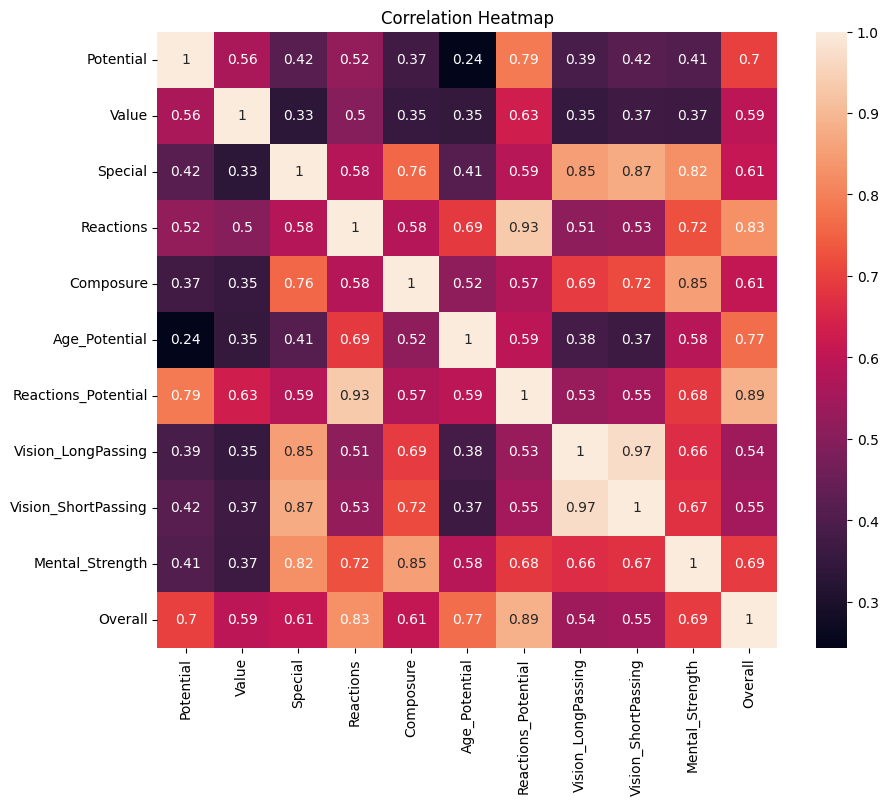

In [80]:
correlation_matrix = filtered_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket')
plt.title('Correlation Heatmap')
plt.show()

In [81]:
X = filtered_df.drop(columns="Overall")
y = filtered_df['Overall']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=30)

# pseudo code for KNN hyper parameter tuning
1. Import libraries:
   - Import NumPy
   - Import GridSearchCV and KFold
   - Import KNeighborsRegressor from sklearn.neighbors

2. Initialize K-Fold Cross-Validation:
   - Create KFold object with:
     - n_splits = 9
     - shuffle = True
     - random_state = 42 for reproducibility

3. Define parameter grid for KNN:
   - Create a dictionary (knn_params) with:
     - 'n_neighbors':  [3, 5, 7, 9, 11, 15, 20]
     - 'weights': ['uniform', 'distance']
     - 'p': [1, 2]

4. Initialize K-Nearest Neighbors model:
   - Create KNeighborsRegressor object (knn)

5. Set up Grid Search:
   - Create GridSearchCV object with:
     - estimator set to knn
     - param_grid set to knn_params
     - cv set to KFold object (kf)
     - scoring metric set to 'r2' for R-squared score

6. Fit Grid Search to training data:
   - Call fit method on GridSearchCV object with:
     - X_train (training features)
     - y_train (training target values)

7. Retrieve and save best parameters and score:
   - Get best parameters from GridSearchCV object (best_knn_params)
   - Get best score from GridSearchCV object (best_knn_score)

8. Print results:
   - Print best parameters
   - Print best score


In [82]:
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold

kf = KFold(n_splits=9, shuffle=True, random_state=42)

# Define parameter grids for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# KNN Grid Search
knn = KNeighborsRegressor()
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_params, cv=kf, scoring='r2')
knn_grid_search.fit(X_train, y_train)

# Save results for KNN
best_knn_params = knn_grid_search.best_params_
best_knn_score = knn_grid_search.best_score_

# Optionally, you can print here for immediate results
print("Best KNN parameters:", best_knn_params)
print("Best KNN score:", best_knn_score)


Best KNN parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best KNN score: 0.9666656674250268


# pseudo code for Pipeline

1. Initialize K-Fold Cross-Validation:
   - Create KFold object with:
     - n_splits = 9
     - shuffle = True  for random shuffling of data
     - random_state = 42 for reproducibility

2. Define models with best parameters:
   - Create KNeighborsRegressor object (best_knn_model) with the best parameters (best_knn_params)
   - Create RandomForestRegressor object (best_rf_model) with random_state set to 42
   - Create LinearRegression object (linear_model)

3. Define pipelines:
   - Create a dictionary (pipelines) with:
     - 'Linear Regression': Pipeline object with:
       - StandardScaler for scaling features
       - linear_model as the regression model
     - 'Best KNN': Pipeline object with:
       - StandardScaler for scaling features
       - best_knn_model as the regression model
     - 'Best RF': Pipeline object with:
       - StandardScaler for scaling features
       - best_rf_model as the regression model


In [83]:
kf = KFold(n_splits=9, shuffle=True, random_state=42)

# Define pipelines with best parameters
best_knn_model = KNeighborsRegressor(**best_knn_params)
best_rf_model = RandomForestRegressor(random_state=42)
linear_model = LinearRegression()

# Define and fit pipelines
pipelines = {
    'Linear Regression': Pipeline([('scaler', StandardScaler()), ('regressor', linear_model)]),
    'Best KNN': Pipeline([('scaler', StandardScaler()), ('regressor', best_knn_model)]),
    'Best RF': Pipeline([('scaler', StandardScaler()), ('regressor', best_rf_model)]),
}


# pseudo code for Linear regression
1. Define Linear Regression pipeline:
     - StandardScaler to standardize the data
     - LinearRegression as the regression model

2. Perform cross-validation for Linear Regression:
   - Use cross_val_predict() to perform 9-fold cross-validation on the training data (X_train, y_train) using the linear_pipeline.
   - Store predictions from cross-validation (y_cv_pred_lr).

3. Evaluate performance on cross-validation data:
   - Calculate Mean Squared Error (MSE) between actual (y_train) and predicted values (y_cv_pred_lr).
   - Calculate Root Mean Squared Error (RMSE) as the square root of MSE.
   - Calculate Mean Absolute Error (MAE).
   - Calculate R-squared (r2) score.
   - Print the cross-validation metrics (MSE, RMSE, MAE, R-squared).

4. Fit the model on the training set:
   - Fit the linear_pipeline on the full training set (X_train, y_train).

5. Evaluate performance on the test data:
   - Predict the target variable on the test set (X_test) using the fitted linear_pipeline (y_test_pred_lr).
   - Calculate MSE, RMSE, MAE, and R-squared score for the test data.
   - Print the test data metrics (MSE, RMSE, MAE, R-squared


In [84]:
# Linear Regression Pipeline
linear_pipeline = Pipeline([('scaler', StandardScaler()), ('regressor', linear_model)])

# Cross-validation for Linear Regression
y_cv_pred_lr = cross_val_predict(linear_pipeline, X_train, y_train, cv=kf)

# Evaluate on cross-validation data
mse_cv_lr = mean_squared_error(y_train, y_cv_pred_lr)
rmse_cv_lr = np.sqrt(mse_cv_lr)
mae_cv_lr = mean_absolute_error(y_train, y_cv_pred_lr)
r2_cv_lr = r2_score(y_train, y_cv_pred_lr)

print("\nLinear Regression Cross-Validation Metrics:")
print(f'Mean Squared Error (MSE): {mse_cv_lr}')
print(f'Root Mean Squared Error (RMSE): {rmse_cv_lr}')
print(f'Mean Absolute Error (MAE): {mae_cv_lr}')
print(f'R-squared Score: {r2_cv_lr}')

# Fit and evaluate on test data
linear_pipeline.fit(X_train, y_train)
y_test_pred_lr = linear_pipeline.predict(X_test)

mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
rmse_test_lr = np.sqrt(mse_test_lr)
mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

print("\nLinear Regression Test Data Metrics:")
print(f'Mean Squared Error (MSE): {mse_test_lr}')
print(f'Root Mean Squared Error (RMSE): {rmse_test_lr}')
print(f'Mean Absolute Error (MAE): {mae_test_lr}')
print(f'R-squared Score: {r2_test_lr}')



Linear Regression Cross-Validation Metrics:
Mean Squared Error (MSE): 4.505385158863233
Root Mean Squared Error (RMSE): 2.122589258161652
Mean Absolute Error (MAE): 1.6605034977317608
R-squared Score: 0.9083934979658319

Linear Regression Test Data Metrics:
Mean Squared Error (MSE): 4.657136906195561
Root Mean Squared Error (RMSE): 2.1580400613046
Mean Absolute Error (MAE): 1.6898747716683626
R-squared Score: 0.9051780632431526


# pseudo code for knn regressor
1. Define KNN Pipeline:
     - StandardScaler to standardize the data
     - KNeighborsRegressor using the best parameters (best_knn_model)

2. Perform cross-validation for KNN:
   - Use cross_val_predict() to perform 9-fold cross-validation on the training data (X_train, y_train) using the knn_pipeline.
   - Store predictions from cross-validation (y_cv_pred_knn).

3. Evaluate performance on cross-validation data:
   - Calculate Mean Squared Error (MSE) between actual (y_train) and predicted values (y_cv_pred_knn).
   - Calculate Root Mean Squared Error (RMSE) as the square root of MSE.
   - Calculate Mean Absolute Error (MAE).
   - Calculate R-squared (r2) score.
   - Print the cross-validation metrics (MSE, RMSE, MAE, R-squared).

4. Fit the model on the training set:
   - Fit the knn_pipeline on the full training set (X_train, y_train).

5. Evaluate performance on the test data:
   - Predict the target variable on the test set (X_test) using the fitted knn_pipeline (y_test_pred_knn).
   - Calculate MSE, RMSE, MAE, and R-squared score for the test data.
   - Print the test data metrics (MSE, RMSE, MAE, R-squared).


In [85]:
# KNN Pipeline
knn_pipeline = Pipeline([('scaler', StandardScaler()), ('regressor', best_knn_model)])

# Cross-validation for KNN
y_cv_pred_knn = cross_val_predict(knn_pipeline, X_train, y_train, cv=kf)

# Evaluate on cross-validation data
mse_cv_knn = mean_squared_error(y_train, y_cv_pred_knn)
rmse_cv_knn = np.sqrt(mse_cv_knn)
mae_cv_knn = mean_absolute_error(y_train, y_cv_pred_knn)
r2_cv_knn = r2_score(y_train, y_cv_pred_knn)

print("\nKNN Cross-Validation Metrics:")
print(f'Mean Squared Error (MSE): {mse_cv_knn}')
print(f'Root Mean Squared Error (RMSE): {rmse_cv_knn}')
print(f'Mean Absolute Error (MAE): {mae_cv_knn}')
print(f'R-squared Score: {r2_cv_knn}')

# Fit and evaluate on test data
knn_pipeline.fit(X_train, y_train)
y_test_pred_knn = knn_pipeline.predict(X_test)

mse_test_knn = mean_squared_error(y_test, y_test_pred_knn)
rmse_test_knn = np.sqrt(mse_test_knn)
mae_test_knn = mean_absolute_error(y_test, y_test_pred_knn)
r2_test_knn = r2_score(y_test, y_test_pred_knn)

print("\nKNN Test Data Metrics:")
print(f'Mean Squared Error (MSE): {mse_test_knn}')
print(f'Root Mean Squared Error (RMSE): {rmse_test_knn}')
print(f'Mean Absolute Error (MAE): {mae_test_knn}')
print(f'R-squared Score: {r2_test_knn}')



KNN Cross-Validation Metrics:
Mean Squared Error (MSE): 2.390186661890476
Root Mean Squared Error (RMSE): 1.5460228529651416
Mean Absolute Error (MAE): 1.098112790507806
R-squared Score: 0.951401127409991

KNN Test Data Metrics:
Mean Squared Error (MSE): 2.234135887239486
Root Mean Squared Error (RMSE): 1.4947026082935315
Mean Absolute Error (MAE): 1.0589702412500572
R-squared Score: 0.9545117319776019


# pseudo code for randomforest regressor
1. Define Random Forest Pipeline:
     - StandardScaler to standardize the data
     - RandomForestRegressor using the best parameters (best_rf_model)

2. Perform cross-validation for Random Forest:
   - Use cross_val_predict() to perform 9-fold cross-validation on the training data (X_train, y_train) using the rf_pipeline.
   - Store predictions from cross-validation (y_cv_pred_rf).

3. Evaluate performance on cross-validation data:
   - Calculate Mean Squared Error (MSE) between actual (y_train) and predicted values (y_cv_pred_rf).
   - Calculate Root Mean Squared Error (RMSE) as the square root of MSE.
   - Calculate Mean Absolute Error (MAE).
   - Calculate R-squared (r2) score.
   - Print the cross-validation metrics (MSE, RMSE, MAE, R-squared).

4. Fit the model on the training set:
   - Fit the rf_pipeline on the full training set (X_train, y_train).

5. Evaluate performance on the test data:
   - Predict the target variable on the test set (X_test) using the fitted rf_pipeline (y_test_pred_rf).
   - Calculate MSE, RMSE, MAE, and R-squared score for the test data.
   - Print the test data metrics (MSE, RMSE, MAE, R-squared).


In [86]:
# Random Forest Pipeline
rf_pipeline = Pipeline([('scaler', StandardScaler()), ('regressor', best_rf_model)])

# Cross-validation for Random Forest
y_cv_pred_rf = cross_val_predict(rf_pipeline, X_train, y_train, cv=kf)

# Evaluate on cross-validation data
mse_cv_rf = mean_squared_error(y_train, y_cv_pred_rf)
rmse_cv_rf = np.sqrt(mse_cv_rf)
mae_cv_rf = mean_absolute_error(y_train, y_cv_pred_rf)
r2_cv_rf = r2_score(y_train, y_cv_pred_rf)

print("\nRandom Forest Cross-Validation Metrics:")
print(f'Mean Squared Error (MSE): {mse_cv_rf}')
print(f'Root Mean Squared Error (RMSE): {rmse_cv_rf}')
print(f'Mean Absolute Error (MAE): {mae_cv_rf}')
print(f'R-squared Score: {r2_cv_rf}')

# Fit and evaluate on test data
rf_pipeline.fit(X_train, y_train)
y_test_pred_rf = rf_pipeline.predict(X_test)

mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print("\nRandom Forest Test Data Metrics:")
print(f'Mean Squared Error (MSE): {mse_test_rf}')
print(f'Root Mean Squared Error (RMSE): {rmse_test_rf}')
print(f'Mean Absolute Error (MAE): {mae_test_rf}')
print(f'R-squared Score: {r2_test_rf}')



Random Forest Cross-Validation Metrics:
Mean Squared Error (MSE): 0.2367518602885345
Root Mean Squared Error (RMSE): 0.48657153666088454
Mean Absolute Error (MAE): 0.27261199696279437
R-squared Score: 0.9951862029534925

Random Forest Test Data Metrics:
Mean Squared Error (MSE): 0.21418058086560363
Root Mean Squared Error (RMSE): 0.46279647888202824
Mean Absolute Error (MAE): 0.26130410022779055
R-squared Score: 0.995639162450568
